In [478]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import skew
from sklearn.preprocessing import normalize

%matplotlib inline

In [479]:
training_data = pd.DataFrame.from_csv('train.csv')
test_data = pd.DataFrame.from_csv('test.csv')

In [480]:
data = pd.concat([training_data, test_data])

In [481]:
data = pd.get_dummies(data)

In [493]:
for c in data.columns:
    num_nulls = len(data[data[c].isnull()])
    if num_nulls != 0:
        print('Feature {} type {} has {} null values, accounts for {}% data set'.format(
                c, data[c].dtypes, num_nulls, round(100 * num_nulls / len(data),2 )))

In [494]:
data = data.fillna(data.mean())

In [495]:
features = data.columns.values.tolist()
features.remove('SalePrice')

In [496]:
X_train = data[:len(training_data)][features]
X_test = data[len(training_data):][features]
y = data[:len(training_data)]['SalePrice']

In [498]:
# Feature selection
coefs = []
for l1_penalty in [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]:
    error = np.sqrt(-cross_val_score(linear_model.Lasso(alpha=l1_penalty, max_iter=100000), X_train, y, scoring="neg_mean_squared_error", cv=5)).mean()
    coefs.append(tuple((l1_penalty, error)))

d:\Users\zeyang\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Users\zeyang\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Users\zeyang\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Users\zeyang\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want t

KeyboardInterrupt: 

In [488]:
alphas = [x[0] for x in coefs]
errors = [x[1] for x in coefs]

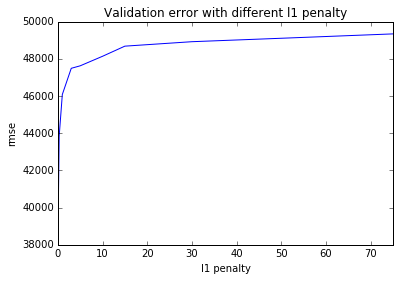

In [489]:
errors = pd.Series(errors, index=alphas)
errors.plot(title='Validation error with different l1 penalty')
plt.xlabel('l1 penalty')
plt.ylabel('rmse')

In [223]:
# Best penalty = 30

In [385]:
model = linear_model.Lasso(alpha=30, normalize=True)
model.fit(X_train, y)

Lasso(alpha=30, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [382]:
coef = pd.Series(model.coef_, index = features)

In [383]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 153 variables and eliminated the other 135 variables


In [384]:
imp_coef = pd.concat([coef.sort_values().head(10),
                      coef.sort_values().tail(10)])

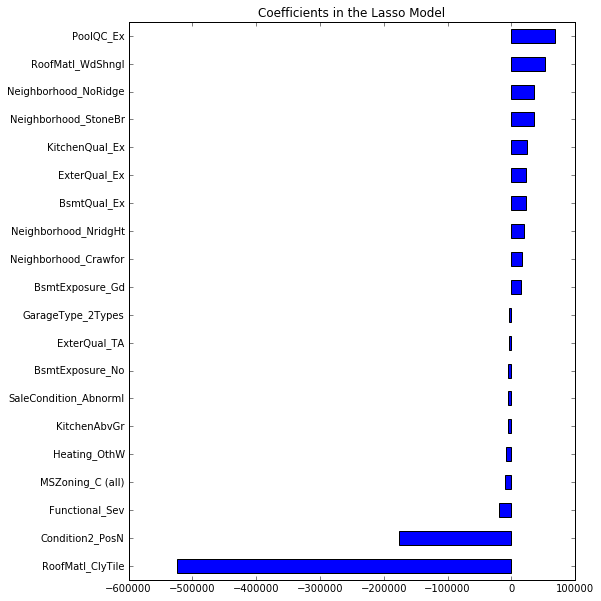

In [379]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [196]:
important_features = [features[i] for i in np.where(model.coef_ != 0)[0]]

In [197]:
important_features

['BsmtFinSF1',
 'Fireplaces',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'KitchenAbvGr',
 'LotArea',
 'MSSubClass',
 'MasVnrArea',
 'OverallCond',
 'OverallQual',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'BldgType_1Fam',
 'BsmtCond_Fa',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtFinType1_GLQ',
 'BsmtQual_Ex',
 'Condition1_Norm',
 'Condition2_PosN',
 'ExterQual_Ex',
 'ExterQual_TA',
 'Exterior1st_BrkFace',
 'Foundation_PConc',
 'Functional_Typ',
 'GarageFinish_Fin',
 'GarageYrBlt_2008.0',
 'GarageYrBlt_2009.0',
 'HeatingQC_Ex',
 'KitchenQual_Ex',
 'KitchenQual_TA',
 'LotConfig_CulDSac',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'PoolQC_Ex',
 'RoofMatl_ClyTile',
 'RoofMatl_WdShngl',
 'SaleCondition_Abnorml',
 'SaleType_New']